# Kryptografia wizualna
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from random import choice
picture = Image.open("obrazek.jpg")

In [2]:
def pictureToMatrix(picture):
    return np.array(picture.convert('1')).astype(int)

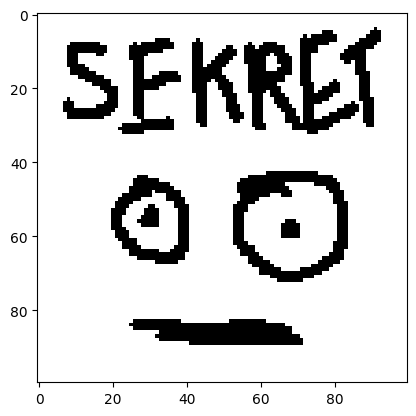

In [3]:
pictureMatrix = pictureToMatrix(picture)
plt.imshow(pictureMatrix, cmap='gray')

---
### Szyfrowanie obrazu

In [4]:
choice_list = ['left','right']

In [5]:
def makeParts(pictureMatrix, choice_list):
    part_1 = []
    part_2 = []
    for y in range(pictureMatrix.shape[0]):
        part_1_row = []
        part_2_row = []
        for x in range(pictureMatrix.shape[1]):
            _choice = choice(choice_list)
            if pictureMatrix[y][x] == 1:
                if _choice == 'left':
                    part_1_row.append(1)
                    part_1_row.append(0)
                    part_2_row.append(1)
                    part_2_row.append(0)
                else:
                    part_1_row.append(0)
                    part_1_row.append(1)
                    part_2_row.append(0)
                    part_2_row.append(1)
            else:
                if _choice == 'left':
                    part_1_row.append(0)
                    part_1_row.append(1)
                    part_2_row.append(1)
                    part_2_row.append(0)
                else:
                    part_1_row.append(1)
                    part_1_row.append(0)
                    part_2_row.append(0)
                    part_2_row.append(1)

        part_1.append(part_1_row)
        part_2.append(part_2_row)            
    return part_1, part_2

In [6]:
part_1, part_2 = makeParts(pictureMatrix, choice_list)

---
### Obraz po zaszyfrowaniu

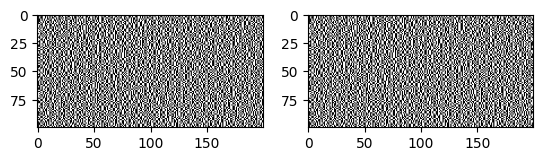

In [7]:
plt.subplot(1, 2, 1)
plt.imshow(part_1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(part_2, cmap='gray')

### Odszyfrowanie obrazu

In [8]:
def decryptPictures(part_1, part_2):
    decrypted = []
    for y in range(len(part_1)):
        row = []
        for x in range(0, len(part_1[0]), 2):
            first_pixel = 1 if part_1[y][x] + part_2[y][x] > 1 else 0
            second_pixel = 1 if part_1[y][x+1] + part_2[y][x+1] > 1 else 0
            row.append(first_pixel)
            row.append(second_pixel)
        decrypted.append(row)

    return decrypted

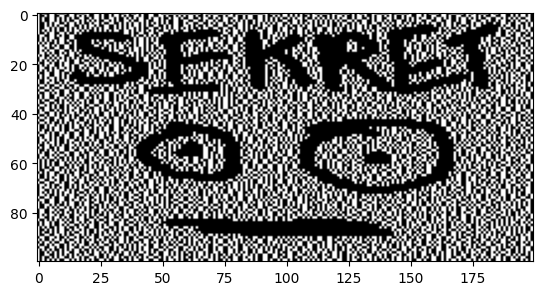

In [9]:
decrypted = decryptPictures(part_1, part_2)
plt.imshow(decrypted, cmap='gray')

#### Korekcja obrazu i szumu

In [10]:
def sizeAndNoiseCorrection(pictureMatrix):
    shape = (len(pictureMatrix), len(pictureMatrix[0]))
    resultArray = []
    for x in range(shape[0]):
        row = []
        for y in range(0, shape[1], 2):
            if pictureMatrix[x][y] == 1 and pictureMatrix[x][y+1] == 0:
                row.append(1)
            elif pictureMatrix[x][y] == 0 and pictureMatrix[x][y+1] == 1:
                row.append(1)
            else:
                row.append(0)
        resultArray.append(row)
    return resultArray

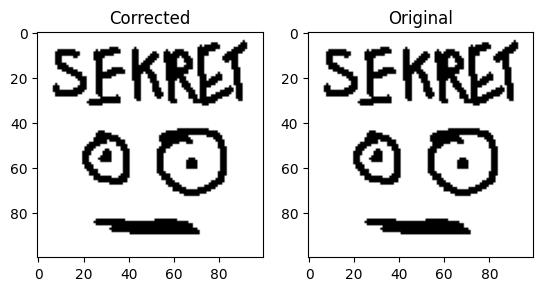

In [11]:
correctedPicture = sizeAndNoiseCorrection(decrypted)
plt.subplot(1, 2, 1)
plt.title("Corrected")
plt.imshow(correctedPicture, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Original")
plt.imshow(pictureMatrix, cmap='gray')